In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

## Implementation Question 1

### a)

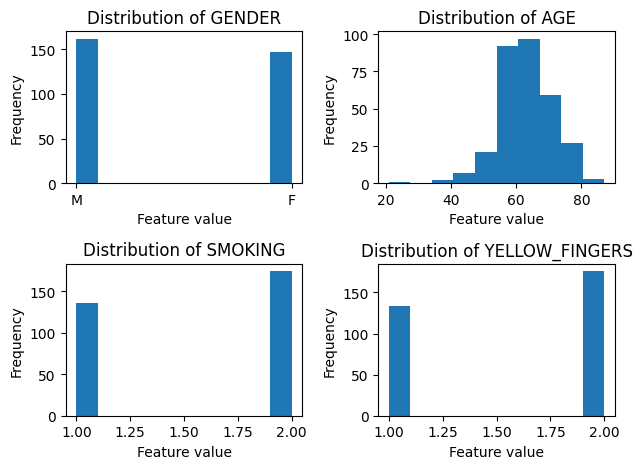

In [12]:
lung_cancer_dataset = pd.read_csv("lung cancer dataset(survey lung cancer).csv")

for i, feature_name in enumerate(lung_cancer_dataset.columns[[0,1,2,3]]):
    plt.subplot(2,2, i+1)

    plt.hist(lung_cancer_dataset[feature_name])

    plt.title(f'Distribution of {feature_name}')
    plt.xlabel("Feature value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

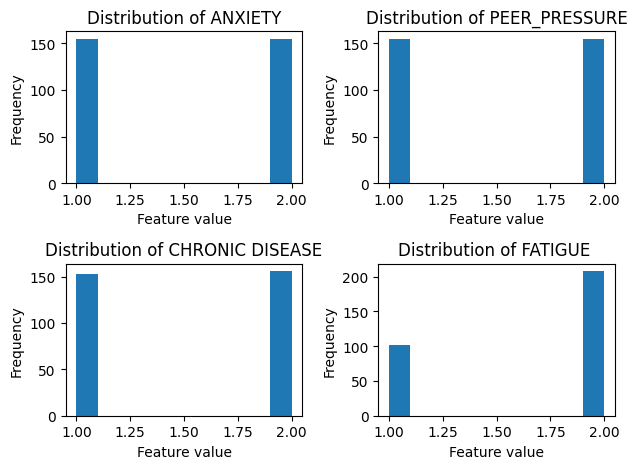

In [13]:
for i, feature_name in enumerate(lung_cancer_dataset.columns[[4,5,6,7]]):
    plt.subplot(2,2, i+1)

    plt.hist(lung_cancer_dataset[feature_name])

    plt.title(f'Distribution of {feature_name}')
    plt.xlabel("Feature value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

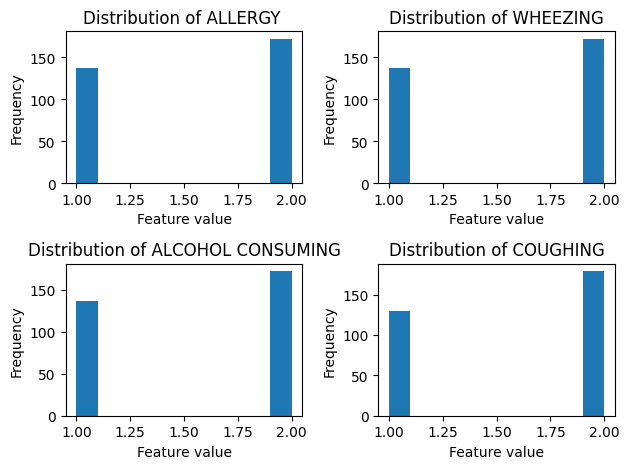

In [14]:
for i, feature_name in enumerate(lung_cancer_dataset.columns[[8,9,10,11]]):
    plt.subplot(2,2, i+1)

    plt.hist(lung_cancer_dataset[feature_name])

    plt.title(f'Distribution of {feature_name}')
    plt.xlabel("Feature value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

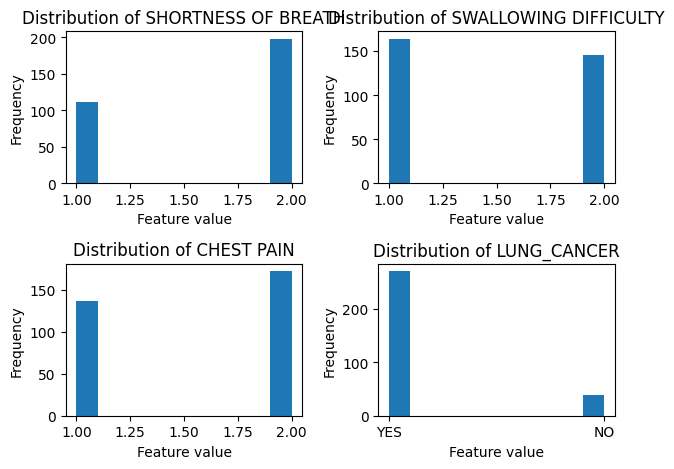

In [15]:
for i, feature_name in enumerate(lung_cancer_dataset.columns[[12,13,14,15]]):
    plt.subplot(2,2, i+1)

    plt.hist(lung_cancer_dataset[feature_name])

    plt.title(f'Distribution of {feature_name}')
    plt.xlabel("Feature value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

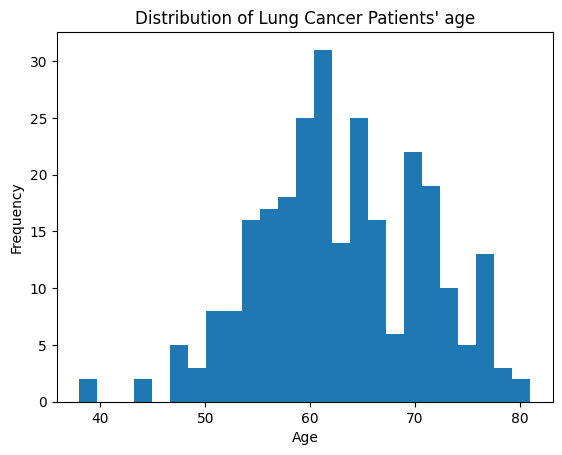

In [16]:
age_has_lung_cancer = lung_cancer_dataset[lung_cancer_dataset['LUNG_CANCER'] == "YES"]
plt.hist(age_has_lung_cancer.AGE, bins=25)
plt.title("Distribution of Lung Cancer Patients' age")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.show()

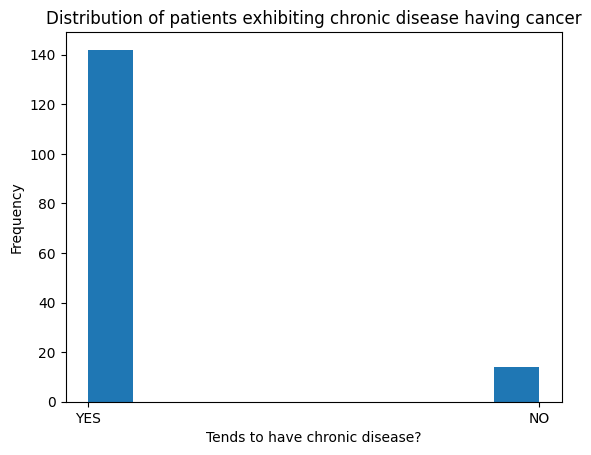

In [17]:
chronic_disease = lung_cancer_dataset[lung_cancer_dataset['CHRONIC DISEASE'] == 2]
plt.hist(chronic_disease.LUNG_CANCER)
plt.title("Distribution of patients exhibiting chronic disease having cancer")
plt.xlabel("Tends to have chronic disease?")
plt.ylabel("Frequency")

plt.show()

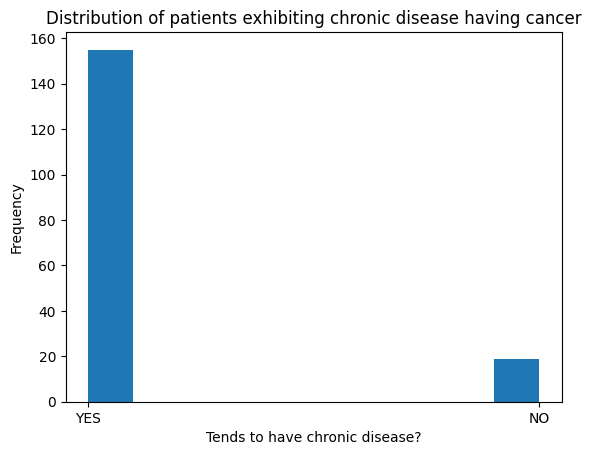

In [18]:
smoker = lung_cancer_dataset[lung_cancer_dataset['SMOKING'] == 2]
plt.hist(smoker.LUNG_CANCER)
plt.title("Distribution of patients exhibiting chronic disease having cancer")
plt.xlabel("Tends to have chronic disease?")
plt.ylabel("Frequency")

plt.show()

### b)

In [19]:
lung_cancer_dataset.loc[lung_cancer_dataset['GENDER'] == "M", 'GENDER'] = 1
lung_cancer_dataset.loc[lung_cancer_dataset['GENDER'] == "F", 'GENDER'] = 2
lung_cancer_dataset.loc[lung_cancer_dataset['LUNG_CANCER'] == "YES", 'LUNG_CANCER'] = 2
lung_cancer_dataset.loc[lung_cancer_dataset['LUNG_CANCER'] == "NO", 'LUNG_CANCER'] = 1
lung_cancer_dataset = lung_cancer_dataset.astype(float)

train_data, test_data, train_target, test_target = train_test_split(lung_cancer_dataset.loc[:, lung_cancer_dataset.columns != 'LUNG_CANCER'].to_numpy(),
                                                                    lung_cancer_dataset.LUNG_CANCER.to_numpy(),
                                                                    test_size=0.3,
                                                                    random_state=42)
print(lung_cancer_dataset.shape)
print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(309, 16)
(216, 15)
(93, 15)
(216,)
(93,)


### c)

In [20]:
logistic_regression_model = LogisticRegression(random_state=42, solver="liblinear", max_iter=350, verbose=1).fit(train_data, train_target)
logistic_regression_model_accuracy = logistic_regression_model.score(test_data, test_target)
print(f'Logistic Regession model has an accuracy of {logistic_regression_model_accuracy:.2f}')

[LibLinear]Logistic Regession model has an accuracy of 0.94


### d)

In [21]:
print(f'Lung cancer training data classification report:')
print(f'-' * 100)
print()
print(classification_report(y_true=train_target, y_pred=logistic_regression_model.predict(train_data), target_names=["No", "Yes"]))

print()
print(f'Lung cancer test data classification report:')
print(f'-' * 100)
print()
print(classification_report(y_true=test_target, y_pred=logistic_regression_model.predict(test_data), target_names=["No", "Yes"]))

Lung cancer training data classification report:
----------------------------------------------------------------------------------------------------

              precision    recall  f1-score   support

          No       0.82      0.28      0.42        32
         Yes       0.89      0.99      0.94       184

    accuracy                           0.88       216
   macro avg       0.85      0.64      0.68       216
weighted avg       0.88      0.88      0.86       216


Lung cancer test data classification report:
----------------------------------------------------------------------------------------------------

              precision    recall  f1-score   support

          No       0.60      0.43      0.50         7
         Yes       0.95      0.98      0.97        86

    accuracy                           0.94        93
   macro avg       0.78      0.70      0.73        93
weighted avg       0.93      0.94      0.93        93



- From the results generated by the model, it seems that the overall accuracy of the model in fact did better than the training. This may be due to the fact the test set used may have had very similar data from some of the training. 

## Implementation Question 2

### a)

In [22]:
k_neighbours_model = KNeighborsClassifier(weights="distance", algorithm="brute").fit(train_data, train_target)
k_neighbours_accuracy = k_neighbours_model.score(test_data, test_target)
print(f'Logistic Regession model has an accuracy of {k_neighbours_accuracy:.2f}')

Logistic Regession model has an accuracy of 0.96


### b)

In [23]:
print(f'Lung cancer training data classification report:')
print(f'-' * 100)
print()
print(classification_report(y_true=train_target, y_pred=k_neighbours_model.predict(train_data), target_names=["No", "Yes"]))

print()
print(f'Lung cancer test data classification report:')
print(f'-' * 100)
print()
print(classification_report(y_true=test_target, y_pred=k_neighbours_model.predict(test_data), target_names=["No", "Yes"]))

Lung cancer training data classification report:
----------------------------------------------------------------------------------------------------

              precision    recall  f1-score   support

          No       0.97      1.00      0.98        32
         Yes       1.00      0.99      1.00       184

    accuracy                           1.00       216
   macro avg       0.98      1.00      0.99       216
weighted avg       1.00      1.00      1.00       216


Lung cancer test data classification report:
----------------------------------------------------------------------------------------------------

              precision    recall  f1-score   support

          No       1.00      0.43      0.60         7
         Yes       0.96      1.00      0.98        86

    accuracy                           0.96        93
   macro avg       0.98      0.71      0.79        93
weighted avg       0.96      0.96      0.95        93



- From the results derived above, the overall accuracy in the train and test sets represent a model that is a good fit for the data provided, however the model seems to be eager to predict a yes class for lung cancer and has difficulties correctly labeling non-cancer data.